In [1]:
import math
import torch
import numpy as np
from matplotlib import pyplot as plt
from GP_function import *

/home/cyy/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading UMAP data
1. loading data from MNIST dataset
2. choosing 600 data points from each training dataset (6000 in total)
3. choosing data points in propotion in the testing sets as well

In [53]:
with open('features_UMAP.npy', 'rb') as f:
    train_x = np.load(f)
    train_y_label = np.load(f)
    test_x = np.load(f)
    test_y = np.load(f)

In [52]:
# train_x, train_y_label, test_x, test_y = \
#     torch.from_numpy(train_x), torch.from_numpy(train_y_label), \
#         torch.from_numpy(test_x), torch.from_numpy(test_y)

### Loading training labels
We use the scores of training samples from DNN to be the y labels

In [54]:
train_y = torch.load('train_score.pt')
train_y.shape

torch.Size([60000, 10])

In [74]:
train_y_label[0:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=torch.uint8)

## Setting up the Model

In [63]:
n = 100
train_x, train_y = train_x[0: n], train_y[0: n, :]
train_y.shape

(100, 10)

### Model Structure

In [ ]:
# train_x = train_x.numpy()
train_y = train_y.numpy()
# test_x = test_x.numpy()

### Cross Validation

In [65]:
all_index = np.arange(0, n, dtype = int)
pred_y = []
for j in range(10):
    temp = []
    for k in range(5):
        print("Model", j, ", Cross Validation Group", k)
        # train
        val_index = np.arange(np.floor(n/5)*k, np.floor(n/5)*(k+1), dtype = int)
        train_index = [i for i in all_index if i not in val_index]
        tr_x = train_x[train_index, :]
        val_x = train_x[val_index, :]
        tr_y = train_y[train_index, j]
        GP = GPfitting(tr_x, tr_y)
        # validation
        result = GPpred(GP, val_x)
        temp.append(result['pred'])
    temp = np.stack(temp)
    pred_y.append(temp)

Model 0 , Cross Validation Group 0
Model 0 , Cross Validation Group 1
Model 0 , Cross Validation Group 2
Model 0 , Cross Validation Group 3
Model 0 , Cross Validation Group 4
Model 1 , Cross Validation Group 0
Model 1 , Cross Validation Group 1
Model 1 , Cross Validation Group 2
Model 1 , Cross Validation Group 3
Model 1 , Cross Validation Group 4
Model 2 , Cross Validation Group 0
Model 2 , Cross Validation Group 1
Model 2 , Cross Validation Group 2
Model 2 , Cross Validation Group 3
Model 2 , Cross Validation Group 4
Model 3 , Cross Validation Group 0
Model 3 , Cross Validation Group 1
Model 3 , Cross Validation Group 2
Model 3 , Cross Validation Group 3
Model 3 , Cross Validation Group 4
Model 4 , Cross Validation Group 0
Model 4 , Cross Validation Group 1
Model 4 , Cross Validation Group 2
Model 4 , Cross Validation Group 3
Model 4 , Cross Validation Group 4
Model 5 , Cross Validation Group 0
Model 5 , Cross Validation Group 1
Model 5 , Cross Validation Group 2
Model 5 , Cross Vali

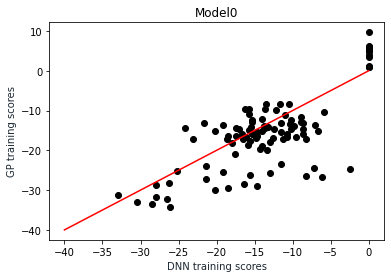

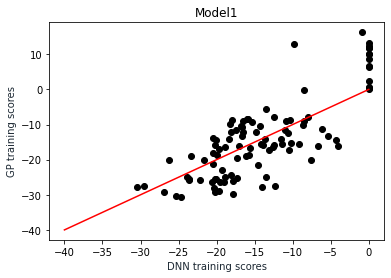

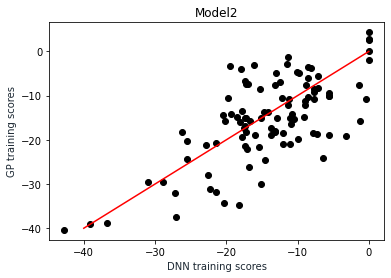

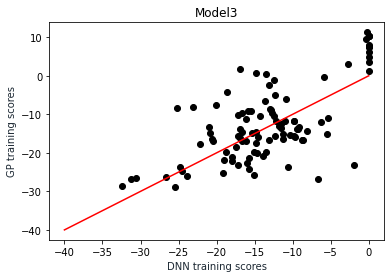

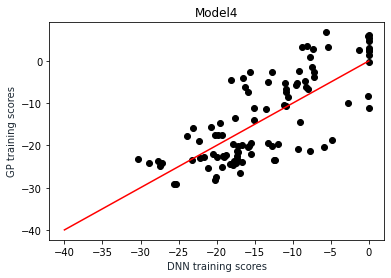

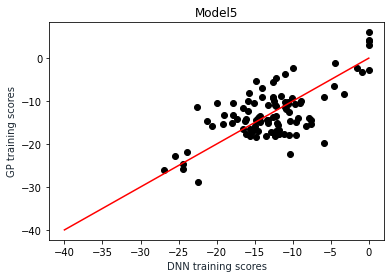

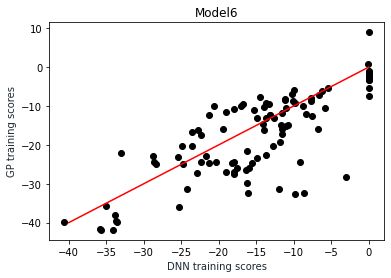

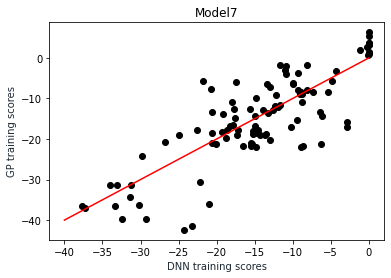

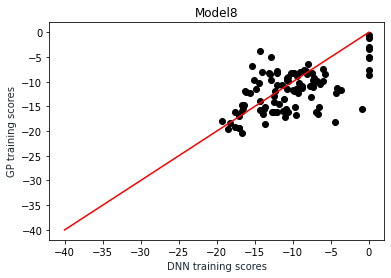

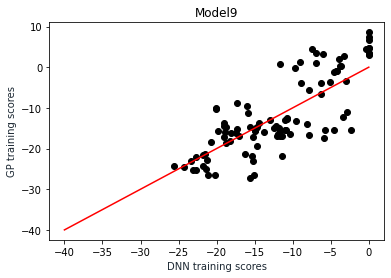

In [67]:
for j in range(10):
    name = "model" + str(j) +".png"
    x_data = train_y[:, j]
    y_data= pred_y[j].flatten()
    plt.plot(x_data, y_data, 'o', color='black')
    x = np.linspace(-40,0,100)
    y = x
    plt.plot(x, y, '-r', label='y=2x+1')
    plt.title('Model' + str(j))
    plt.xlabel('DNN training scores', color='#1C2833')
    plt.ylabel('GP training scores', color='#1C2833')
    plt.show()

### Model Training

In [42]:
GPs = []
for j in range(10):
    print("Model", j)
    y = train_y[:, j]
    x = train_x
    GP = GPfitting(x, y)
    GPs.append(GP)

Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9


## Model Evaluation

In [43]:
results = []
for j in range(10):
    print("Model", j)
    result = GPpred(GPs[j], test_x)
    results.append(result)

Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9


In [44]:
test_x.shape

(1000, 2)

In [45]:
test_score = torch.load('test_score.pt')
test_score.shape

torch.Size([10000, 10])

In [46]:
test_score[0:20, 0]

tensor([-1.9522e+01, -1.2894e+01, -1.7891e+01, -9.8943e-06, -1.1060e+01,
        -1.6469e+01, -1.1971e+01, -5.2570e+00, -6.4241e+00, -1.3967e+01,
        -1.1444e-05, -6.1579e+00, -2.0017e+01, -5.4120e-05, -2.1672e+01,
        -1.3845e+01, -1.2308e+01, -1.1986e+01, -5.4740e+00, -1.7058e+01])

In [47]:
results[0]['pred'][0:20]

array([-11.2538591 , -27.06195494, -16.34640656, -24.12833066,
       -17.2523477 , -16.69716777, -13.63651144, -15.79002857,
       -16.05044323, -16.38671967, -19.5467935 , -15.06952155,
       -12.3070796 , -24.00032102, -22.16011276, -41.49737346,
       -16.61248487, -10.07167376, -33.71588016, -16.49527813])

In [48]:
for j in range(10):
    results[j] = torch.from_numpy(results[j]['pred'])

In [49]:
scores = torch.stack(results)
# scores = F.log_softmax(scores, dim = 0)

In [50]:
from sklearn.metrics import accuracy_score
# scores = torch.stack(scores)
pred_y = torch.argmax(scores, dim = 0)
accuracy_score(test_y, pred_y)

0.39

predict error

In [86]:
test_score = torch.load('test_score.pt')
test_score = torch.transpose(test_score[0:1000, :], 0, 1)
print("predict score shape:", scores.shape)
print("real score shape:", test_score.shape)


predict score shape: torch.Size([10, 1000])
real score shape: torch.Size([10, 1000])


In [87]:
pred_y[0:30]

tensor([7, 2, 2, 5, 4, 2, 4, 4, 9, 7, 5, 5, 4, 5, 1, 3, 4, 3, 3, 4, 7, 5, 5, 3,
        4, 5, 9, 4, 5, 1])

In [88]:
for j in range(10):
    loss = torch.nn.MSELoss()
    output = loss(scores[j, :], test_score[j, :])
    print("L2 loss for model", j, ":", output, "  mean:", torch.mean(scores[j, :]))

L2 loss for model 0 : tensor(79.5508)   mean: tensor(-9.6709)
L2 loss for model 1 : tensor(50.5827)   mean: tensor(-9.5833)
L2 loss for model 2 : tensor(91.9003)   mean: tensor(-8.1926)
L2 loss for model 3 : tensor(77.2568)   mean: tensor(-7.3310)
L2 loss for model 4 : tensor(47.5791)   mean: tensor(-10.2698)
L2 loss for model 5 : tensor(84.2119)   mean: tensor(-8.7220)
L2 loss for model 6 : tensor(142.7697)   mean: tensor(-10.8157)
L2 loss for model 7 : tensor(67.1875)   mean: tensor(-9.7484)
L2 loss for model 8 : tensor(40.1538)   mean: tensor(-6.6988)
L2 loss for model 9 : tensor(41.5981)   mean: tensor(-9.2816)


In [89]:
test_x.shape

torch.Size([1000, 2])